## <div align="left">UNIVERSIDAD GALILEO</div><div align="left">Postgrado en Análisis y Predicción de Datos</div><div align="left">Statistical Learning I</div><div align="left">Luis Florian, 0710082</div>


### <div align="center">Práctica I - Gradient Descent en Tensorflow</div>
Esta práctica consiste en usar un dataset de ventas de casas e implementar gradient descent aplicando regresión entre las variables OverallQual y SalePrice.  La idea es presentar el entrenamiento con Gradient Descent utilizando TensorFlow v1.  También se utilizará Tensorboard para monitorear que el error disminuya conforme avanzan las iteraciones. 

In [45]:
#Librerías
import numpy as np
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
from IPython import display

#Compatibilidad para TensorFlow v1
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()

In [46]:
#Loding dataset
dataset = np.load('data/proyecto_training_data.npy')

#Escalamos los valores de la variable SalePrice para que los cálculos del error no sean elevados.
dataset[0:, 0]/= 1000

In [47]:
#SalePrice variable dependiente y OverallQuall la variable explicativa.
saleprice = dataset[:,0].reshape(-1,1)
overallquall = dataset[:,1].reshape(-1,1)

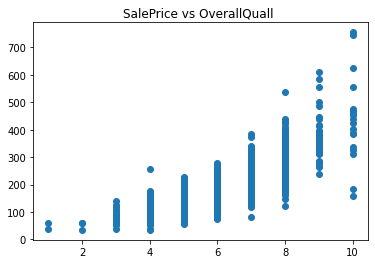

In [48]:
plt.scatter(overallquall,saleprice)
plt.title("SalePrice vs OverallQuall ")
plt.show()

Existe una relación lineal positiva entre las variables Saleprice y OverallQuall.

## Hipótesis

Luego de identificar una relación lineal entre las variables SalePrice y OverallQuall, se definirá regresión lineal donde la hipótesis es el precio de la casa y sus pesos serán la pendiente de la recta y su intercepto.   $h(x) = wx + b$.  Siendo $w$ el peso/pendiente y $b$ el intercepto/bias

Para el modelo se utilizará TensorFlow y este será calculado por medio de operaciones vectorizadas definidas por grafos. Se utilizará Gradiente Descent para optimizar la busqueda de los coeficientes del modelo.  

## Modelo
En el caso de regresión lineal, la hipótesis es una linea recta $h(x)= wx+b$ donde $w$ es el vector **Weights** y $b$ es el escalar **Bias**. $w$ y $b$ son los parámetros del modelo.

Lo que haremos será estimar el valor de dichos parámetros para la data dada, tal que el resultado produzca el mejor costo J, lo cuál está definido con la siguiente función de costo.
\sum_{n=1}^{\infty} 2^{-n}

$J(w,b) = \dfrac {1}{2m} \sum_{i=1}^{m} (y_{i} - h(x_{i})^2$

m es el numero de entradas en el dataset.  Esta función de costo también es llamada **Mean Squared Error (MSE)**.

La idea es encontrar valores de parámetros óptimos que minimicen a la función de costo (J).  Para esta tarea estarémos utiliznaod un algoritmo optimizador llamado **Gradient Descent**.

In [52]:
def regresion_lineal(x, y , epochs, lr, print_interval):
    tf.reset_default_graph()
    g = tf.Graph()
    initial_parametros = tf.zeros((2,1),tf.float64)
    with tf.name_scope("parametros_w_b"):
        weights = tf.Variable(name="w", initial_value=initial_parametros)
        x = tf.concat([x, tf.ones_like(x)], axis=1)
    with tf.name_scope("Hipotesis"):
        y_hat = tf.matmul(x,weights)
    with tf.name_scope("Error"):
        error = (0.5*tf.reduce_mean(tf.math.square(y - y_hat)))
    with tf.name_scope("Gradientes"):
        gradients = tf.gradients(error ,weights)
    with tf.name_scope("Actualizar_Pesos"):
        weights_update = tf.assign(weights,(tf.add(weights,tf.scalar_mul(-lr,gradients[0]))))
    
    #Scalar
    error_summary = tf.summary.scalar(name='Error_vs_Epochs', tensor=error)

    with tf.Session() as session:
        curr_datetime = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
        writer = tf.summary.FileWriter("./tensorboard/"+curr_datetime+"_lr="+str(lr)+"_epochs="+str(epochs),session.graph)
        session.run(tf.global_variables_initializer())
        for epoch in range(0,epochs):
            if ((epoch+1) % print_interval) == 0:
                print("epoch:"+str(epoch+1)+" error: "+str(session.run(error)))
      
            writer.add_summary(session.run(error_summary), epoch)
            session.run(weights_update)


        writer.close()
    session.close()
       
    
    

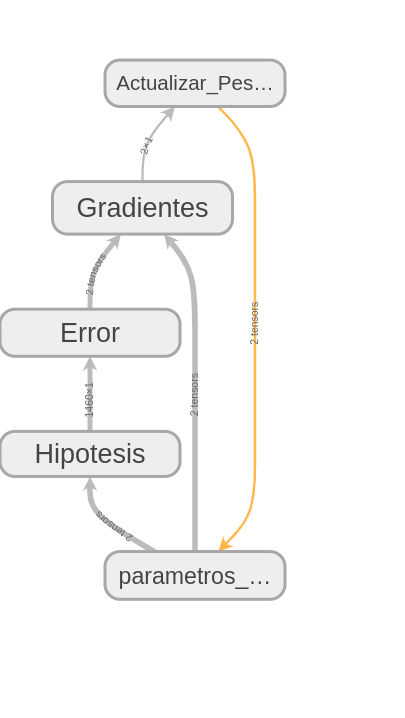

In [57]:
display.Image("./img/Graph.png")

In [53]:
#Learning rate grande
regresion_lineal(overallquall,saleprice,100,0.8,5)

epoch:5 error: 1.5638649304501052e+16
epoch:10 error: 1.3035551349504527e+31
epoch:15 error: 1.0865746502588085e+46
epoch:20 error: 9.057111885259299e+60
epoch:25 error: 7.549529678661831e+75
epoch:30 error: 6.292888847023965e+90
epoch:35 error: 5.245419479961269e+105
epoch:40 error: 4.37230438827298e+120
epoch:45 error: 3.6445218035931706e+135
epoch:50 error: 3.0378807139986114e+150
epoch:55 error: 2.5322167707670443e+165
epoch:60 error: 2.1107220387577006e+180
epoch:65 error: 1.7593863117603192e+195
epoch:70 error: 1.4665314225038683e+210
epoch:75 error: 1.222423068097734e+225
epoch:80 error: 1.0189472482397751e+240
epoch:85 error: 8.493405612110085e+254
epoch:90 error: 7.079653928742725e+269
epoch:95 error: 5.901225261077589e+284
epoch:100 error: 4.9189494193489174e+299


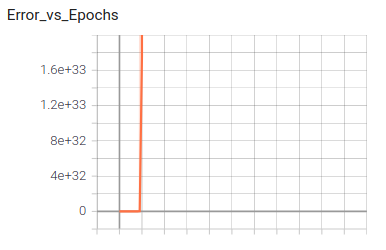

In [54]:
display.Image("./img/error_vs_epochs_1.png")

Se observa que debido a que el learning rate es muy grande, el error va en aumento.

In [55]:
#lr 0.01, epochs 100
regresion_lineal(overallquall,saleprice,100,0.01,10)

epoch:10 error: 1428.621318236252
epoch:20 error: 1424.479865308545
epoch:30 error: 1422.1621322921783
epoch:40 error: 1419.866477287337
epoch:50 error: 1417.5926267617533
epoch:60 error: 1415.3403736109176
epoch:70 error: 1413.1095126997097
epoch:80 error: 1410.8998408414168
epoch:90 error: 1408.7111567792233
epoch:100 error: 1406.5432611678807


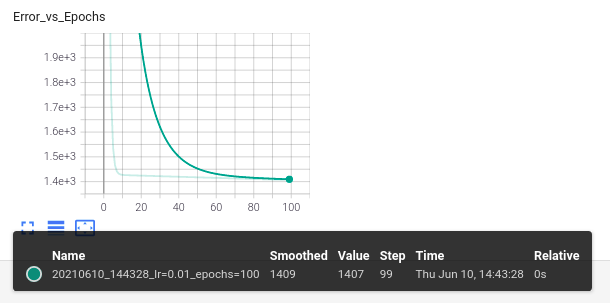

In [58]:
display.Image("./img/error_vs_epochs_lr=0.01_epochs=100.png")

In [56]:
#lr 0.001, epochs 1000
regresion_lineal(overallquall,saleprice,1000,0.001,100)

epoch:100 error: 1432.1206880229308
epoch:200 error: 1424.2728454219214
epoch:300 error: 1421.956104939894
epoch:400 error: 1419.6628965028528
epoch:500 error: 1417.3914650808324
epoch:600 error: 1415.141603446656
epoch:700 error: 1412.9131067708877
epoch:800 error: 1410.705772169294
epoch:900 error: 1408.519398684262
epoch:1000 error: 1406.353787266486


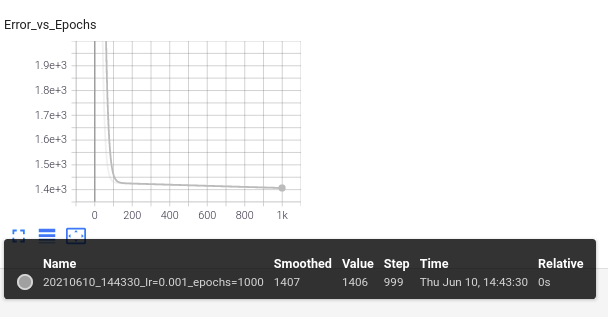

In [59]:
display.Image("./img/error_vs_epochs_lr=0.001_epochs=1000.png")

Se observa que el lr=0.001 es el adecuado y que mientras aumentamos los epochs o iteraciones el error disminuye.  Entonces, se realizará una última prueba, esta vez con 10,000 iteraciones y se espera que el error disminuya aún más.

In [66]:
#lr 0.001, epochs 10000
regresion_lineal(overallquall,saleprice,10000,0.001,200)

epoch:200 error: 1424.2728454219214
epoch:400 error: 1419.6628965028528
epoch:600 error: 1415.141603446656
epoch:800 error: 1410.705772169294
epoch:1000 error: 1406.353787266486
epoch:1200 error: 1402.0840638685443
epoch:1400 error: 1397.8950470630912
epoch:1600 error: 1393.7852113288104
epoch:1800 error: 1389.7530599798856
epoch:2000 error: 1385.797124620955
epoch:2200 error: 1381.9159646123635
epoch:2400 error: 1378.1081665455201
epoch:2600 error: 1374.3723437281785
epoch:2800 error: 1370.7071356794372
epoch:3000 error: 1367.111207634297
epoch:3200 error: 1363.583250057572
epoch:3400 error: 1360.1219781669988
epoch:3600 error: 1356.7261314653515
epoch:3800 error: 1353.3944732814057
epoch:4000 error: 1350.1257903195788
epoch:4200 error: 1346.9188922180786
epoch:4400 error: 1343.7726111154134
epoch:4600 error: 1340.6858012250834
epoch:4800 error: 1337.6573384183223
epoch:5000 error: 1334.686119814719
epoch:5200 error: 1331.7710633805796
epoch:5400 error: 1328.9111075348833
epoch:5600 e

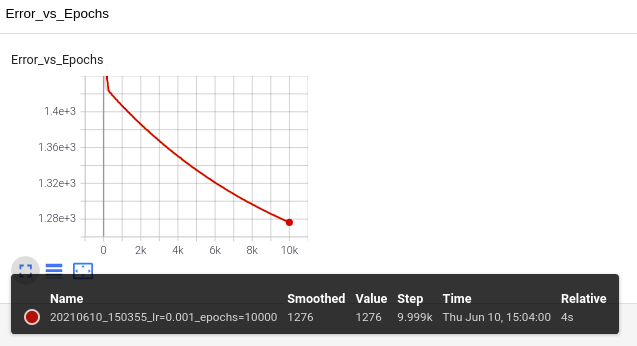

In [64]:
display.Image("./img/error_vs_epochs_lr=0.001_epochs=10000.png")

### Conclusiones

- El uso de gradiente descendente nos ayuda optimizar la búsqueda de óptimos coeficientes.

- Tensorboard es una excelente herramienta para la búsqueda de hiperparámetros como learning rate.  Facilita la visualización de los resultados en tiempo real y de esta forma las pruebas en la búsqueda del mejor valor de learning rate se facilita.

- Tensorboard puede almacenar el registro de diferentes corridas del modelo, y nos permite visualizar en una misma gráfica más de un registro a la vez, permitiendonos hacer comparaciones.
